In [121]:
import pandas as pd
import matplotlib
import seaborn as sns

In [122]:
db_wework = pd.read_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/All_Access_DB_comma.csv')

In [123]:
db_wework.head(5)

,Country,City,Product Type,Lead Source,Month,New Contracts,Total Contracts,Ending Contracts,New Accounts,Total Accounts,Ending Accounts,New Members,Total Members,Ending Memberships
0,Argentina,Buenos Aires,WeWork All Access,E-Commerce Lead,01/02/21,2,2,0,2,2,0,2,2,0
1,Argentina,Buenos Aires,WeWork All Access,E-Commerce Lead,01/03/21,0,2,0,0,2,0,0,2,0
2,Argentina,Buenos Aires,WeWork All Access,E-Commerce Lead,01/04/21,0,2,0,0,2,0,0,2,0
3,Argentina,Buenos Aires,WeWork All Access,E-Commerce Lead,01/05/21,2,4,0,2,4,0,2,4,0
4,Argentina,Buenos Aires,WeWork All Access,E-Commerce Lead,01/06/21,0,4,0,0,4,0,0,4,0


In [124]:
db_wework.columns

Index([u'Country', u'City', u'Product Type', u'Lead Source', u'Month',
       u'New Contracts', u'Total Contracts', u'Ending Contracts',
       u'New Accounts', u'Total Accounts', u'Ending Accounts', u'New Members',
       u'Total Members', u'Ending Memberships'],
      dtype='object')

# Documentation
a. **Lead Source Column**

**E-Commerce closing** -> A contract that was completely done through e-commerce, from beginning to signing

**E-Commerce lead** -> A contract lead that was opened through ecommerce, but for any reason needed assistance from a human sales representative before signing.

**Sales lead & closing** -> A contract that was opened by the sales team and continued with the team until signing.

b. **Product Type Column**

**WeWork All Access** -> The normal all access product explained above, where the member pays a fixed monthly price to have unlimited access to shared desks across the globe whenever they would like

**WeWork All Access - Pay per Use** -> The same product as above, but without a monthly payment. Instead, users only pay for the number of times they use the product per month, at the end of the month.

c. **New vs Total vs Ending Accounts, Contracts & Memberships**

**New** represents the accounts, contracts or memberships that began in the specific month - in any day between the first or last day.

**Total** represents all the accounts, contracts or memberships that were active at the end of the month - independent of having begun in this specific month or being a contract that began in the previous months and is still active

**Ending** represents all the accounts, contracts or memberships that were canceled during the specific month - and therefore are no longer part of the total active members.

d. **Accounts vs Members** -> An account represents a company, but this same company can have several contracts with several different members (individual users) per contract.

In [125]:
db_wework.describe()

,New Contracts,Total Contracts,Ending Contracts,New Accounts,Total Accounts,Ending Accounts,New Members,Total Members,Ending Memberships
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,20.650456,39.854103,12.848024,19.975684,38.541033,12.361702,56.000000,135.155015,30.379939
std,35.378476,68.451492,26.212686,34.666345,67.153984,25.419646,212.991526,350.840346,174.585847
min,0.000000,-18.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,8.000000,0.000000
50%,6.000000,10.000000,3.000000,6.000000,8.000000,3.000000,10.000000,29.000000,3.000000
75%,22.000000,32.000000,12.000000,20.000000,32.000000,12.000000,36.000000,101.000000,15.000000
max,220.000000,378.000000,171.000000,220.000000,378.000000,171.000000,3098.000000,3189.000000,3044.000000


In [126]:
db_wework\
.groupby(['Country', 'City'])\
.agg([
    'mean',
    'sum'
])

New Contracts       Total Contracts        \
                                         mean   sum            mean   sum   
Country   City                                                              
Argentina Buenos Aires              14.608696   336       30.739130   707   
Brazil    Belo Horizonte             5.809524   122        8.285714   174   
          Osasco                     2.000000     2        2.000000     2   
          Porto Alegre               2.461538    32        5.384615    70   
          Rio de Janeiro            11.846154   308       16.730769   435   
          Sao Bernardo do Campo      3.052632    58        3.842105    73   
          Sao Paulo                 42.235294  1436       73.676471  2505   
Chile     Santiago de Chile         27.764706   472       55.764706   948   
Colombia  Barranquilla               4.500000    72        9.000000   144   
          Bogota                    41.333333   868       92.571429  1944   
          Medellan                  22.125000   354       64.125000  1026   
Mexico    Centro Monterrey           2.117647    36        4.470588    76   
          Ciudad de Maxico          59.529412  2024      111.911765  3805   
          Guadalajara                9.000000   180       17.350000   347   
          Monterrey                 13.565217   312       22.869565   526   
          Tlajomulco de Zaaiga       6.666667    40        8.333333    50   
          Zapopan                    6.454545   142       12.727273   280   

                                Ending Contracts       New Accounts        \
                                            mean   sum         mean   sum   
Country   City                                                              
Argentina Buenos Aires                 10.043478   231    13.565217   312   
Brazil    Belo Horizonte                3.857143    81     5.714286   120   
          Osasco                        0.000000     0     2.000000     2   
          Porto Alegre                  0.538462     7     2.461538    32   
          Rio de Janeiro                7.269231   189    11.769231   306   
          Sao Bernardo do Campo         2.631579    50     3.052632    58   
          Sao Paulo                    26.117647   888    41.588235  1414   
Chile     Santiago de Chile            16.058824   273    26.588235   452   
Colombia  Barranquilla                  3.187500    51     4.500000    72   
          Bogota                       25.714286   540    38.666667   812   
          Medellan                      9.750000   156    20.125000   322   
Mexico    Centro Monterrey              0.941176    16     2.000000    34   
          Ciudad de Maxico             39.588235  1346    58.176471  1978   
          Guadalajara                   5.150000   103     8.900000   178   
          Monterrey                     9.130435   210    13.217391   304   
          Tlajomulco de Zaaiga          0.333333     2     6.333333    38   
          Zapopan                       3.818182    84     6.272727   138   

                                Total Accounts       Ending Accounts        \
                                          mean   sum            mean   sum   
Country   City                                                               
Argentina Buenos Aires               29.739130   684        8.478261   195   
Brazil    Belo Horizonte              8.190476   172        3.857143    81   
          Osasco                      2.000000     2        0.000000     0   
          Porto Alegre                5.384615    70        0.538462     7   
          Rio de Janeiro             16.500000   429        7.192308   187   
          Sao Bernardo do Campo       3.842105    73        2.631579    50   
          Sao Paulo                  72.411765  2462       25.705882   874   
Chile     Santiago de Chile          54.117647   920       15.000000   255   
Colombia  Barranquilla                9.000000   144        3.187500    51   
          Bogo

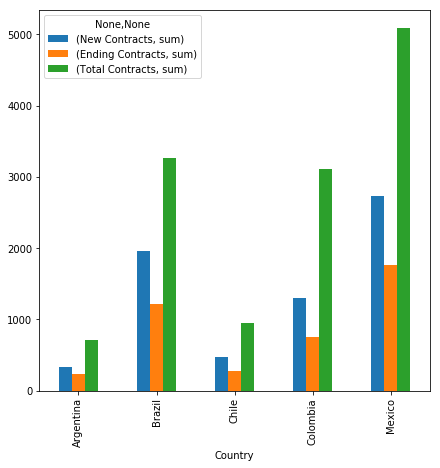

In [127]:
#Soma de novos contratos e final de novos contratos por país
##insights:
#Mexico apresenta a maior quantidadede contratos, em segundo lugar, Brasil
db_wework\
.filter(items=['Country', 'New Contracts', 'Ending Contracts', 'Total Contracts'])\
.groupby(['Country'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(7, 7))

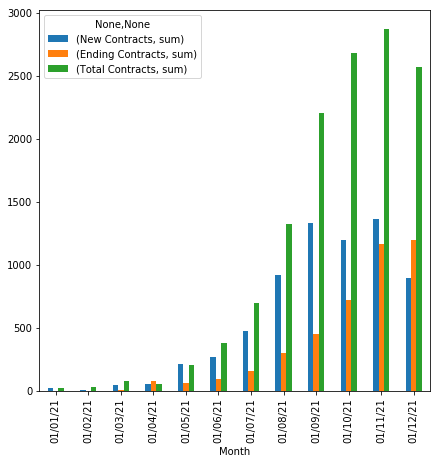

In [201]:
#Soma de contratos por mes
##Insights
#A partir de setembro houve uma diminuição de novos contratos mas continuou aumentando o encerramento
db_wework\
.filter(items=['Month', 'New Contracts', 'Ending Contracts', 'Total Contracts'])\
.groupby(['Month'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(7, 7))

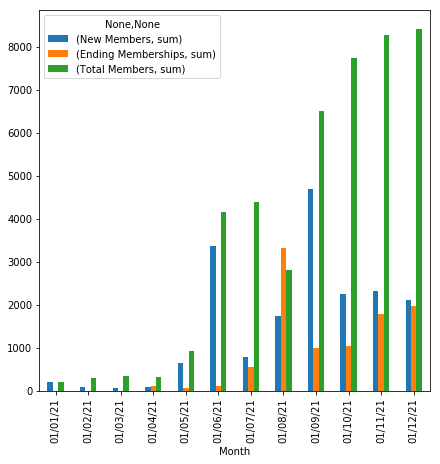

In [211]:
db_wework\
.filter(items=['Month', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Month'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(7, 7))

In [203]:
db_wework\
.filter(items=['Month', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Month'])\
.sum()\
.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_agg_month.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12189add0>,
      dtype=object)

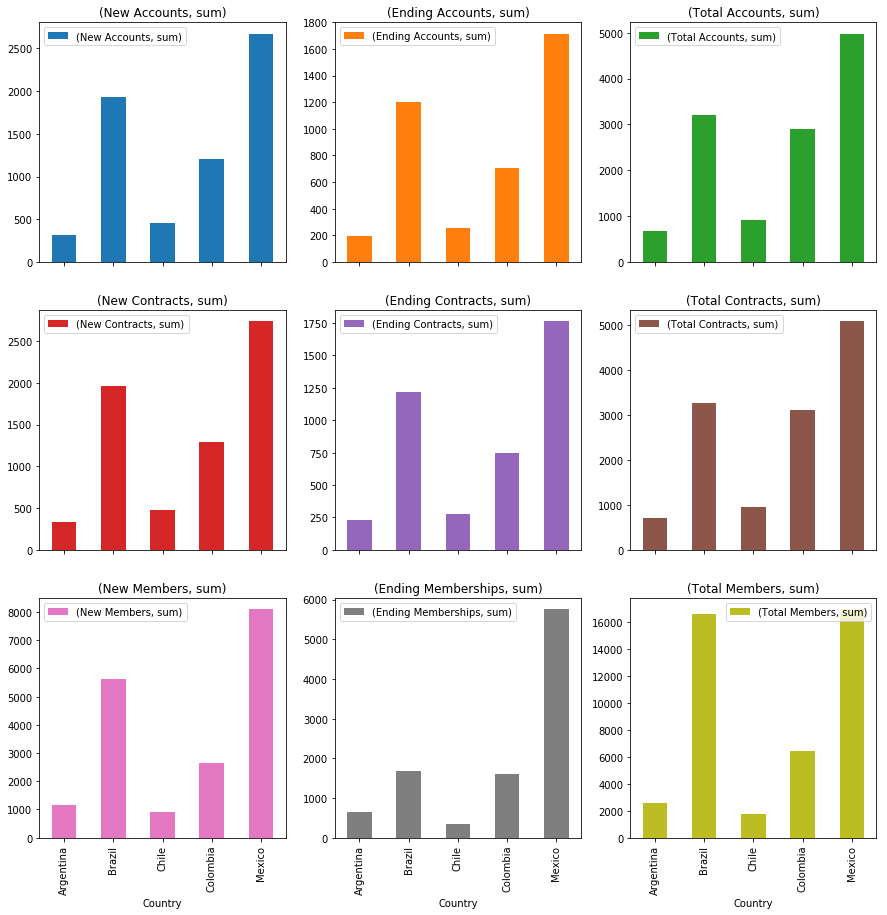

In [129]:
##Insights
#Brasil tem mais MEMBROS por contratos
db_wework\
.filter(items=['Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Country'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(15, 15), subplots=True, layout=(3, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b81d90>,
      dtype=object)

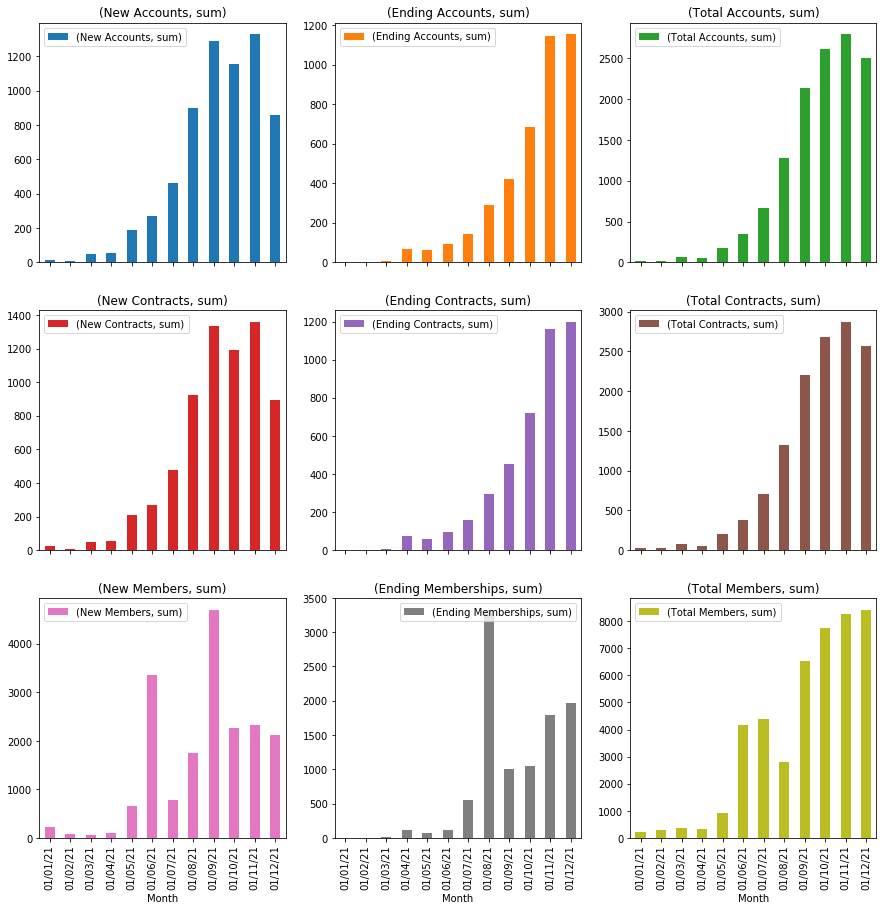

In [130]:
db_wework\
.filter(items=['Month', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Month'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(15, 15), subplots=True, layout=(3, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220c9350>,
      dtype=object)

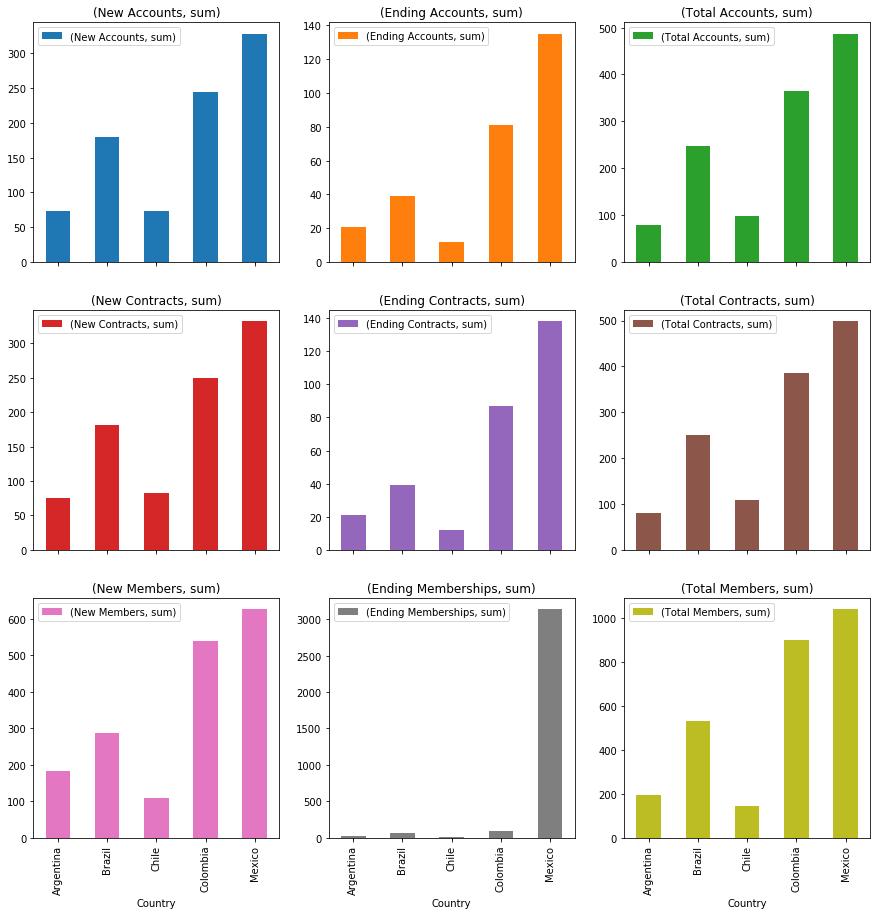

In [131]:
db_wework[db_wework.Month == '01/08/21']\
.filter(items=['Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Country'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(15, 15), subplots=True, layout=(3, 3))

In [205]:
db_wework\
.filter(items=['Product Type', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Product Type']).sum()#.plot(kind='bar', figsize=(15, 15))

,New Accounts,Ending Accounts,Total Accounts,New Contracts,Ending Contracts,Total Contracts,New Members,Ending Memberships,Total Members
Product Type,,,,,,,,,
WeWork All Access,6558,4067,12642,6780,4227,13074,15406,9995,33012
WeWork All Access - Pay Per Use,14,0,38,14,0,38,3018,0,11454


In [207]:
db_wework\
.filter(items=['Product Type', 'Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Product Type', 'Country'])\
.sum()

New Accounts  Ending Accounts  \
Product Type                    Country                                    
WeWork All Access               Argentina           312              195   
                                Brazil             1926             1199   
                                Chile               452              255   
                                Colombia           1206              704   
                                Mexico             2662             1714   
WeWork All Access - Pay Per Use Brazil                6                0   
                                Mexico                8                0   

                                           Total Accounts  New Contracts  \
Product Type                    Country                                    
WeWork All Access               Argentina             684            336   
                                Brazil               3188           1952   
                                Chile                 920            472   
                                Colombia             2890           1294   
                                Mexico               4960           2726   
WeWork All Access - Pay Per Use Brazil                 20              6   
                                Mexico                 18              8   

                                           Ending Contracts  Total Contracts  \
Product Type                    Country                                        
WeWork All Access               Argentina               231              707   
                                Brazil                 1215             3239   
                                Chile                   273              948   
                                Colombia                747             3114   
                                Mexico                 1761             5066   
WeWork All Access - Pay Per Use Brazil                    0               20   
                                Mexico                    0               18   

                                           New Members  Ending Memberships  \
Product Type                    Country                                      
WeWork All Access               Argentina         1164                 638   
                                Brazil            2972                1677   
                                Chile              914                 332   
                                Colombia          2636                1593   
                                Mexico            7720                5755   
WeWork All Access - Pay Per Use Brazil            2640                   0   
                                Mexico             378                   0   

                                           Total Members  
Product Type                    Country                   
WeWork All Access               Argentina           2612  
                                Brazil              6335  
                                Chile               1777  
                                Colombia            6450  
                                Mexico             15838  
WeWork All Access - Pay Per Use Brazil             10320  
                                Mexico              1134

In [208]:
db_wework\
.filter(items=['Product Type', 'Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Product Type', 'Country'])\
.sum()\
.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_agg_product_type_country.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122cf7cd0>,
      dtype=object)

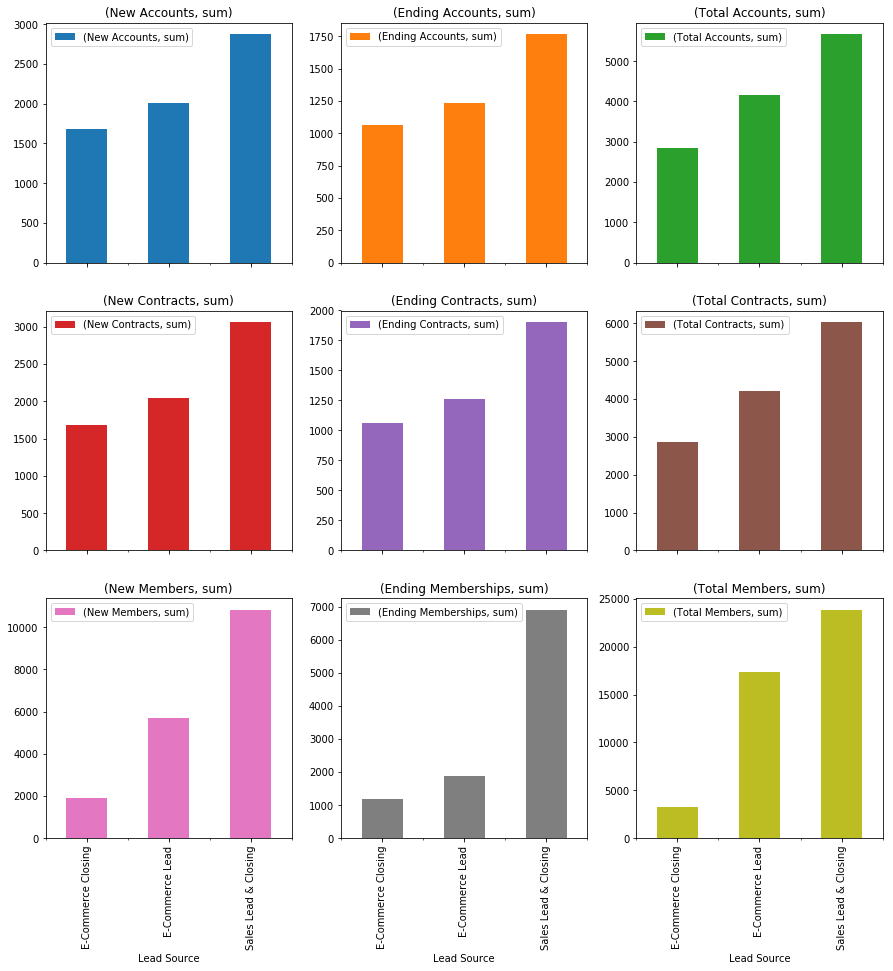

In [133]:
#
db_wework\
.filter(items=['Lead Source', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Lead Source'])\
.agg([
    'sum'
]).plot(kind='bar', figsize=(15, 15), subplots=True, layout=(3, 3))

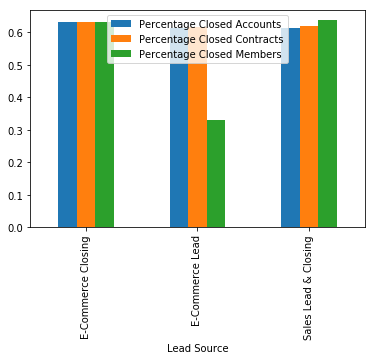

In [191]:
#OLHAR ANÁLISE NO EXCEL: https://docs.google.com/spreadsheets/d/1axV2NUtOHt2jusXztrFs1ONdWL7vdESDWkdk9CVpfN0/edit?usp=sharing
db_wework_agg_lead = db_wework\
.filter(items=['Lead Source', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Lead Source'])\
.sum()\
.reset_index()

db_wework_agg_lead['Percentage Closed Accounts'] = db_wework_agg['Ending Accounts']/db_wework_agg['New Accounts']

db_wework_agg_lead['Percentage Closed Contracts'] = db_wework_agg['Ending Contracts']/db_wework_agg['New Contracts']

db_wework_agg_lead['Percentage Closed Members'] = db_wework_agg['Ending Memberships']/db_wework_agg['New Members']

db_wework_agg_lead\
.filter(items=['Lead Source', 'Percentage Closed Accounts', 'Percentage Closed Contracts', 'Percentage Closed Members'])\
.plot(x='Lead Source', kind='bar')

#db_wework_agg_lead.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_agg_lead.csv')

In [210]:
db_wework\
.filter(items=['Lead Source', 'Product Type', 'Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Lead Source', 'Product Type', 'Country'])\
.sum()\
.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_agg_lead_source_product_type_country.csv')

In [190]:
#OLHAR ANÁLISE NO EXCEL: https://docs.google.com/spreadsheets/d/1axV2NUtOHt2jusXztrFs1ONdWL7vdESDWkdk9CVpfN0/edit?usp=sharing
db_wework_agg_country = db_wework\
.filter(items=['Country', 'New Accounts', 'Ending Accounts', 'Total Accounts', 'New Contracts', 'Ending Contracts', 'Total Contracts', 'New Members', 'Ending Memberships', 'Total Members'])\
.groupby(['Country'])\
.sum()\
.reset_index()

#db_wework_agg_country['Percentage Closed Accounts'] = db_wework_agg['Ending Accounts'].div(db_wework_agg['New Accounts'])

#db_wework_agg_country['Percentage Closed Contracts'] = db_wework_agg['Ending Contracts']/db_wework_agg['New Contracts']

#db_wework_agg_country['Percentage Closed Members'] = db_wework_agg['Ending Memberships']/db_wework_agg['New Members']

db_wework_agg_country\
#.filter(items=['Country', 'Percentage Closed Accounts', 'Percentage Closed Contracts', 'Percentage Closed Members'])\
#.plot(x='Country', kind='bar')

db_wework_agg_country.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_agg_country.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123223cd0>,
      dtype=object)

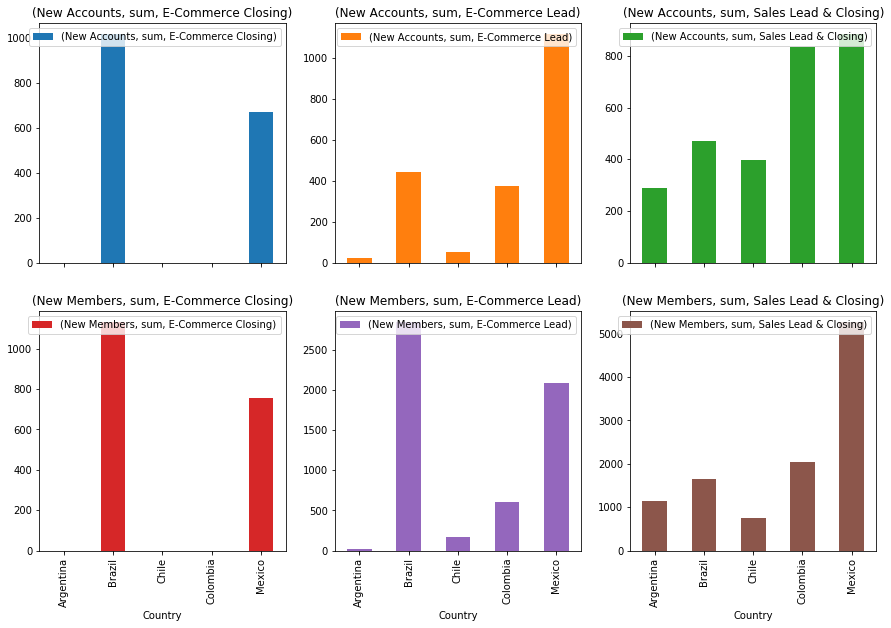

In [134]:
db_wework\
.filter(items=['Lead Source', 'Country', 'New Accounts', 'New Members'])\
.groupby(['Country', 'Lead Source'])\
.agg([
    'sum'
]).unstack(level=1).plot(kind='bar', figsize=(15, 15), subplots=True, layout=(3, 3))

In [146]:
##Nenhum insight sobre cidades
db_wework\
.filter(items=['City', 'Country', 'New Accounts', 'Ending Accounts', 'New Members', 'Ending Memberships'])\
.groupby(['Country', 'City'])\
.agg([
    'sum'
])#.unstack(level=1).plot(kind='bar', figsize=(20, 20), subplots=True, layout=(6, 6))

New Accounts Ending Accounts New Members  \
                                         sum             sum         sum   
Country   City                                                             
Argentina Buenos Aires                   312             195        1164   
Brazil    Belo Horizonte                 120              81         152   
          Osasco                           2               0           4   
          Porto Alegre                    32               7          38   
          Rio de Janeiro                 306             187         448   
          Sao Bernardo do Campo           58              50          72   
          Sao Paulo                     1414             874        4898   
Chile     Santiago de Chile              452             255         914   
Colombia  Barranquilla                    72              51          98   
          Bogota                         812             500        2098   
          Medellan                       322             153         440   
Mexico    Centro Monterrey                34              16          76   
          Ciudad de Maxico              1978            1304        6914   
          Guadalajara                    178             103         364   
          Monterrey                      304             204         516   
          Tlajomulco de Zaaiga            38               2          60   
          Zapopan                        138              85         168   

                                Ending Memberships  
                                               sum  
Country   City                                      
Argentina Buenos Aires                         638  
Brazil    Belo Horizonte                       103  
          Osasco                                 0  
          Porto Alegre                          10  
          Rio de Janeiro                       270  
          Sao Bernardo do Campo                 52  
          Sao Paulo                           1242  
Chile     Santiago de Chile                    332  
Colombia  Barranquilla                          60  
          Bogota                              1377  
          Medellan                             156  
Mexico    Centro Monterrey                      19  
          Ciudad de Maxico                    5190  
          Guadalajara                          169  
          Monterrey                            279  
          Tlajomulco de Zaaiga                   2  
          Zapopan                               96

# Traditional DB

In [192]:
db_wework_trad = pd.read_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/Traditional Reservation DB csv.csv')

In [193]:
db_wework_trad.head(5)

,Country,City,# of Accounts,# of Contracts,# of Members
0,Chile,Santiago de Chile,1608,2241,32487
1,Mexico,Centro Monterrey,84,264,2927
2,Brazil,Osasco,37,369,15670
3,Colombia,Medellín,1049,1482,20258
4,Argentina,Buenos Aires,881,1255,21777


In [198]:
#OLHAR ANÁLISE NO EXCEL: https://docs.google.com/spreadsheets/d/1axV2NUtOHt2jusXztrFs1ONdWL7vdESDWkdk9CVpfN0/edit?usp=sharing
db_wework_trad\
.groupby('Country')\
.sum()\
.to_csv('/Users/ricardoferreira/Downloads/Cases-DA/WeWork/db_wework_trad_agg_country.csv')
#.plot(kind='bar', figsize=(15, 15))